# Linear Regression- From Scratch

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd

# Create Data

In [2]:
X = [1, 2, 3, 4]
Y = [2, 4, 6, 8]

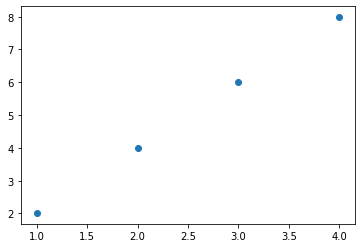

In [3]:
plt.scatter(X, Y)

# Initialize hyper parameters

In [4]:
# notice small alpha value
alpha = 0.0001
iters = 500

# theta is a row vector
theta = np.array([[3, 3, 3, 3]])

# Define Cost Function

In [5]:
def computeCost(X, y, theta):
    inner = np.power(((X @ theta.T) - y), 2) # @ means matrix multiplication of arrays. If we want to use * for multiplication we will have to convert all arrays to matrices
    return np.sum(inner) / (2 * len(X))

In [6]:
computeCost(X, Y, theta)

315.0

# Define Gradient Descent

In [7]:
def gradientDescent(X, Y, theta, alpha, iters):
    for i in range(iters):
        cost = computeCost(X, Y, theta)
        theta = theta - (alpha/len(X)) * np.sum((X @ theta.T - Y), axis=0)
        
        #if i % 10 == 0: # just look at cost every ten loops for debugging
            #print(cost)
            #print(theta)
            #print((alpha/len(X)) * np.sum((X @ theta.T - Y), axis=0))

    return (theta, cost)

# Run the algorithm

In [8]:
g, cost = gradientDescent(X, Y, theta, alpha, iters)  
print(g, cost)

[[2.01594736 2.01594736 2.01594736 2.01594736]] 117.63497505606347


In [9]:
g

array([[2.01594736, 2.01594736, 2.01594736, 2.01594736]])

No handles with labels found to put in legend.


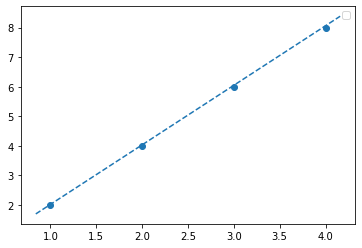

In [10]:
plt.scatter(X, Y)
axes = plt.gca()
x_vals = np.array(axes.get_xlim()) 
y_vals = g[0][0] * x_vals #the line equation
plt.plot(x_vals, y_vals, '--')
plt.legend()

# Linear Regression - Using Scikit-Learn

In [11]:
data = {'X':[1, 2, 3, 4], 'Y':[3, 6, 9, 12]} 
df = pd.DataFrame(data)

In [12]:
df

,X,Y
0,1,3
1,2,6
2,3,9
3,4,12


In [13]:
B = df.pop('Y')

In [14]:
A = df

In [15]:
reg = LinearRegression()
reg.fit(A, B)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
reg.coef_

array([3.])

In [17]:
reg.predict(np.array([[6]]))

array([18.])